# Magic Carpet

In [4]:
!pip install scikit_posthocs

In [1]:
# prompt: connect to google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# workspace path (set to your own GDrive path)

%cd /content/drive/MyDrive/Colab_Notebooks/MagicCarpet


/content/drive/MyDrive/Colab_Notebooks/MagicCarpet


In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy.stats import kruskal
from scipy import stats
import scikit_posthocs as sp

import seaborn as sns
sns.set()

In [7]:
def color_significant(val):
    color = 'green' if val <= 0.05 else 'none'
    return f'background-color: {color}'

## 2nd Test


### Raw Time Dataset

In [8]:
data_time_csv = pd.read_csv("./2ndTest/time/timeRaw.csv")

data_time_csv['time'] = pd.to_numeric(data_time_csv['time'], errors='coerce')

# Drop any rows with missing values
data_time_csv.dropna(inplace=True)

# preview dataset
data_time_csv.head()


,user,technique,time
0,10minionMedex,AnalogSteering,60.02888
1,10minionMedex,VirtualCircle,100.71330
2,10minionMedex,WalkingInPlace,85.51553
3,11rafifa,AnalogSteering,57.87074
4,11rafifa,VirtualCircle,86.40684


#### Summary Statistics

In [9]:
# Calculate descriptive statistics for each technique
descriptive_stats_time = data_time_csv.groupby('technique')['time'].describe()
descriptive_stats_time


,count,mean,std,min,25%,50%,75%,max
technique,,,,,,,,
AnalogSteering,17.0,64.909411,7.717135,52.73764,57.870740,63.011590,70.221850,78.78856
VirtualCircle,18.0,97.735043,24.262236,61.39062,81.725700,88.537135,116.702525,149.60710
WalkingInPlace,14.0,81.694734,7.525705,65.89153,76.952685,81.642395,86.618997,93.45484


- Mean Time: AnalogSteering has the shortest mean time (64.91), suggesting it may be the most efficient for users. VirtualCircle has the longest mean time (97.74), indicating potentially less efficient navigation compared to the other techniques.
- Variability: VirtualCircle also has the highest standard deviation (24.26), indicating more variability in user performance compared to AnalogSteering (7.72) and WalkingInPlace (7.53).
- Range: The range of times is widest for VirtualCircle (from 61.39 to 149.61), again showing greater variability.

In [10]:
# Comparative Analysis using Kruskal-Wallis H test
stat_time, p_value_time = kruskal(data_time_csv[data_time_csv['technique'] == 'AnalogSteering']['time'],
                                  data_time_csv[data_time_csv['technique'] == 'VirtualCircle']['time'],
                                  data_time_csv[data_time_csv['technique'] == 'WalkingInPlace']['time'])

# Print the result of the statistical test
kruskal_test_time_result = {'Kruskal-Wallis H statistic': stat_time, 'p-value': p_value_time}
kruskal_test_time_result


{'Kruskal-Wallis H statistic': 27.262607900302953,
 'p-value': 1.2022641946133228e-06}

The Kruskal-Wallis H test indicates that there is a statistically significant difference in times between the different techniques



In [11]:
groups = {
    'AnalogSteering': data_time_csv[data_time_csv['technique'] == 'AnalogSteering']['time'],
    'VirtualCircle': data_time_csv[data_time_csv['technique'] == 'VirtualCircle']['time'],
    'WalkingInPlace': data_time_csv[data_time_csv['technique'] == 'WalkingInPlace']['time']
}

# Dunn's Test for multiple comparisons
p_values = sp.posthoc_dunn([group for group in groups.values()], p_adjust='bonferroni')
p_values.rename(columns={1: 'AnalogSteering', 2: 'VirtualCircle', 3: 'WalkingInPlace'}, inplace=True)
p_values.index = ['AnalogSteering', 'VirtualCircle', 'WalkingInPlace']

cmap = sns.diverging_palette(133, 0, as_cmap=True)
p_values = p_values.style.applymap(color_significant).format("{:.4f}")
p_values


,AnalogSteering,VirtualCircle,WalkingInPlace
AnalogSteering,1.0000,0.0000,0.0011
VirtualCircle,0.0000,1.0000,0.6975
WalkingInPlace,0.0011,0.6975,1.0000


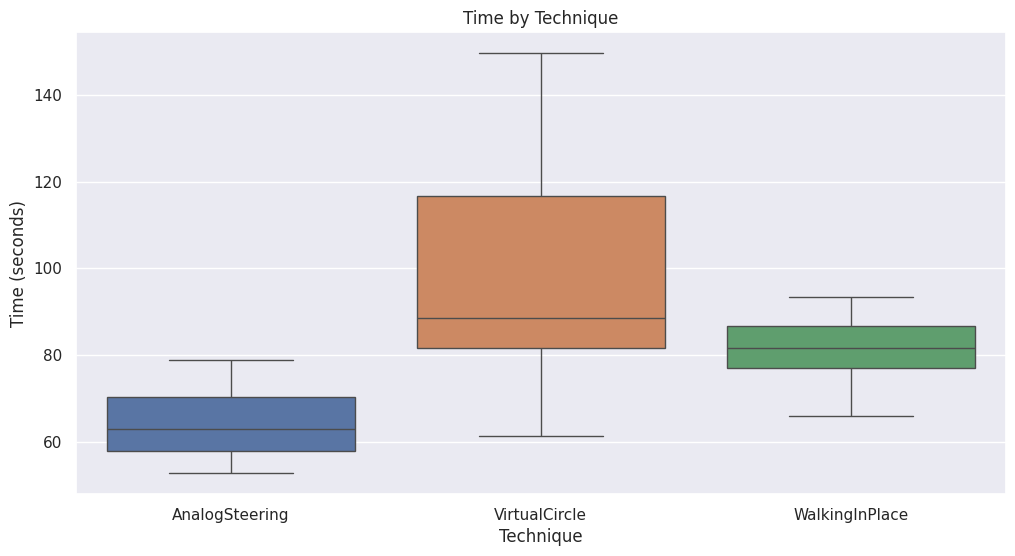

In [ ]:
plt.figure(figsize=(12, 6))

sns.boxplot(x='technique', y='time', data=data_time_csv, hue="technique")
plt.title('Time by Technique')
plt.xlabel('Technique')
plt.ylabel('Time (seconds)')
plt.show()

**Summary**

- AnalogSteering: This technique has the shortest times with minimal variability, indicating more efficient navigation.
- VirtualCircle: This technique shows the longest times and the widest range, suggesting less efficient and more variable user navigation.
- WalkingInPlace: This technique has intermediate times with relatively low variability compared to VirtualCircle.

### Total Time for Comparison Dataset

In [ ]:
data_time_comparison = pd.read_csv("./2ndTest/time/totalTimeForComparison.csv")

data_time_comparison['timeAnalog'] = pd.to_numeric(data_time_comparison['timeAnalog'], errors='coerce')
data_time_comparison['timeCircle'] = pd.to_numeric(data_time_comparison['timeCircle'], errors='coerce')
data_time_comparison['timewip'] = pd.to_numeric(data_time_comparison['timewip'], errors='coerce')

data_time_comparison.dropna(inplace=True)

data_time_comparison.head()

,userAnalog,timeAnalog,userCircle,timeCircle,userwip,timewip
0,10minionMedex,60.03,10minionMedex,100.71,10minionMedex,85.52
1,11rafifa,57.87,11rafifa,86.41,11rafifa,76.39
2,12barbaraDoHugo,57.00,12barbaraDoHugo,126.99,12barbaraDoHugo,88.77
3,13danielDoHugo,76.35,13danielDoHugo,83.05,13danielDoHugo,85.51
4,14ricardoGaips,70.22,14ricardoGaips,88.18,14ricardoGaips,77.07


In [ ]:
# Calculate descriptive statistics for each technique
descriptive_stats_time_comparison = data_time_comparison.describe()
descriptive_stats_time_comparison

,timeAnalog,timeCircle,timewip
count,18.000000,18.00000,18.000000
mean,67.987778,97.73500,98.860556
std,15.054375,24.26213,41.821605
min,52.740000,61.39000,65.890000
25%,58.410000,81.73000,78.035000
50%,63.990000,88.53500,85.515000
75%,72.402500,116.70000,92.755000
max,120.320000,149.61000,245.300000


In [ ]:
# Comparative Analysis using Kruskal-Wallis H test
stat_time_comparison, p_value_time_comparison = kruskal(data_time_comparison['timeAnalog'],
                                                        data_time_comparison['timeCircle'],
                                                        data_time_comparison['timewip'])

# Print the result of the statistical test
kruskal_test_time_comparison_result = {'Kruskal-Wallis H statistic': stat_time_comparison, 'p-value': p_value_time_comparison}
kruskal_test_time_comparison_result


{'Kruskal-Wallis H statistic': 23.815488215488216,
 'p-value': 6.738022270715664e-06}

The Kruskal-Wallis H test indicates that there is a statistically significant difference in times between the different techniques

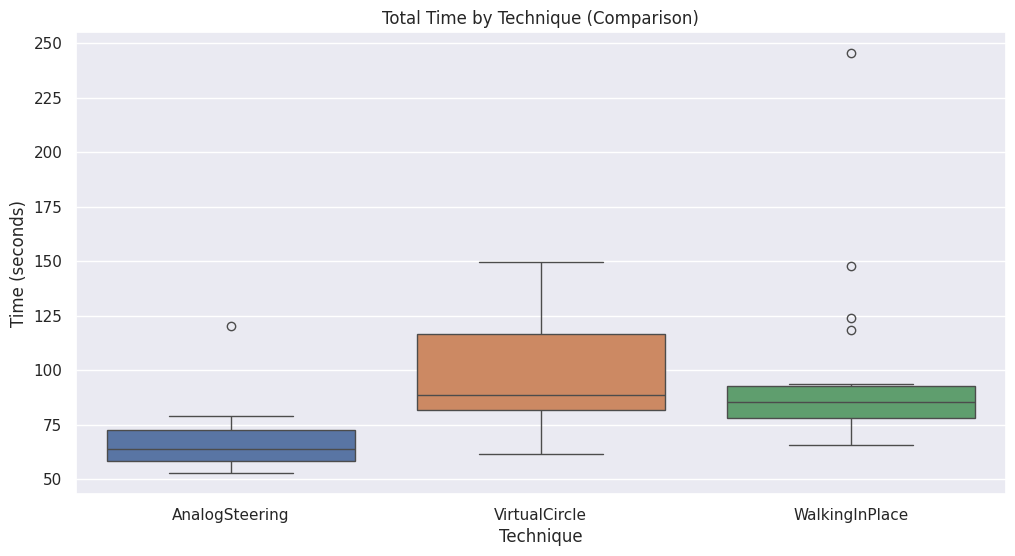

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_time_comparison[['timeAnalog', 'timeCircle', 'timewip']])
plt.title('Total Time by Technique (Comparison)')
plt.xlabel('Technique')
plt.ylabel('Time (seconds)')
plt.xticks([0, 1, 2], ['AnalogSteering', 'VirtualCircle', 'WalkingInPlace'])
plt.show()

**Summary**

- AnalogSteering: This technique has the shortest times with minimal variability, indicating more efficient navigation.
- VirtualCircle: This technique shows longer times and a wider range, suggesting less efficient and more variable user navigation.
- WalkingInPlace: This technique has the longest times and the widest range, indicating the most variability and potential inefficiencies in navigation.

AnalogSteering is the most efficient technique, while VirtualCircle and WalkingInPlace show more variability and longer times. WalkingInPlace, in particular, exhibits significant variability, which might be due to users' differing comfort levels and proficiency with the technique.